In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [10]:
clf

sklearn.tree._classes.DecisionTreeClassifier

In [12]:
X = data[['X_1', 'X_2']]
y = data.Y

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

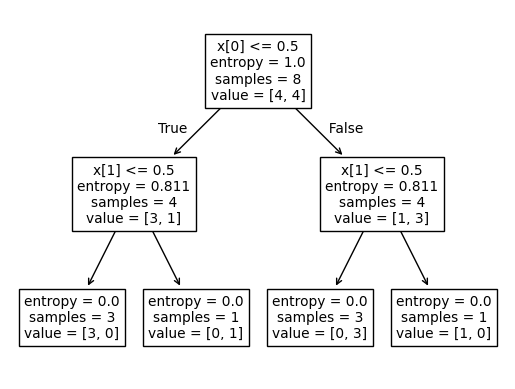

In [14]:
tree.plot_tree(clf)

In [19]:
iris_data_train = pd.read_csv('train_iris.csv')

In [23]:
iris_data_test = pd.read_csv('test_iris.csv')

In [20]:
iris_data_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [48]:
X_train = iris_data_train.drop(['Unnamed: 0','species'], axis=1)
y_train = iris_data_train['species']

In [49]:
X_test = iris_data_test.drop(['Unnamed: 0','species'], axis=1)
y_test = iris_data_test['species']

In [21]:
max_depth_values = range(1, 101)

In [50]:
scores_data = pd.DataFrame()

In [51]:
import numpy as np
rs = np.random.seed(0)
for max_depth in max_depth_values:
    
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_scores_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})

    scores_data = pd.concat([scores_data, temp_scores_data])

In [52]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [53]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type',
                           value_name='score')

In [54]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<Axes: xlabel='max_depth', ylabel='score'>

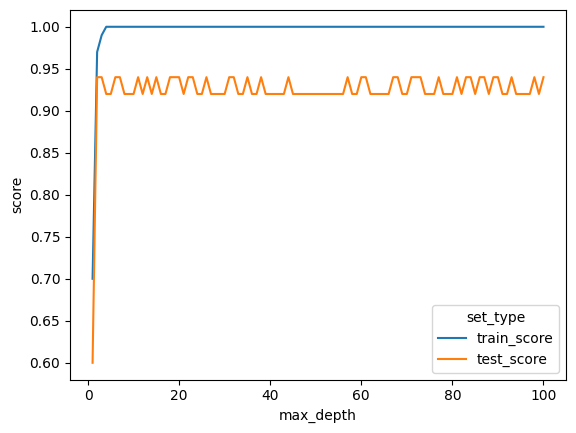

In [55]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [4]:
dogs_and_cats_train = pd.read_csv('dogs_n_cats.csv')

In [5]:
dogs_and_cats_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [7]:
X_train = dogs_and_cats_train.drop('Вид', axis=1)
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [8]:
y_train = dogs_and_cats_train['Вид']

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
X_test = pd.read_json('dataset_209691_15.txt')

In [12]:
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,17,20.4,1,0,0
1,27,32.4,1,1,0
2,33,39.6,1,1,0
3,34,40.8,1,1,0
4,24,28.8,1,1,0


In [16]:
res = pd.Series(clf.predict(X_test))
res.value_counts()

котик      59
собачка    41
Name: count, dtype: int64